<center>
# Майнор "Интеллектуальный анализ данных" 
# Курс "Введение в анализ данных"
# Mushroom DataSet from OpenML
<img src="../../img/mushroom.jpg">
## Автор материала: Студент ФКН ПИ НИУ ВШЭ
## ПУТРО ПАВЕЛ
</center>
<a href=""></a>

### <center>
Набор взят с сайта OpenML.org<br>
<a href="">http://www.openml.org/d/24</a><br>
Коротко о наборе: 
В наборе представленны 8124 экземпляра 23-х видов пластинчатых грибов из рода шампьньонов, среди них есть точно съедобные, есть точно ядовитые и те которые ещё никто не рискнул попробывать(=ядовитые). При этом нет строгого правила какой гриб будет ядовитым, а какой нет.<br>
Задание состоит в том, чтобы определить съедобность грибов, причём, если ошибки второго рода (ложные срабатывания) вполне себе можно пережить, то ошибки первого рода могут быть фатальны для горе-грибников предпочитающих подобные классификаторы своему опыту и здравому смыслу.
<img src="../../img/gilled_mushoorms.jpg" height="360" width="360">
# Приятного апетита!
</center>

In [1]:
# Python 2 and 3 compatibility
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import pandas as pd
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


Опишем признаки по-подробней:
Все признаки представленны символами английского алфавита. Пропущенные значения обозначаются знаком ?.
Всего 2 класса class: съедобные(edible)=e, ядовитые(poisonous)=p
И 22 атрибута (перевод. Оригинал можно взять на сайте):

Поясняющая картинка:
<img src="../../img/plan.jpg" height="360" width="360">
Атрибуты:
1. форма шляпки cap-shape: 
колокол=b, коническая=c, выпуклая=x, плоская=f, кнопка=k, вогнутая=s
2. поверхность шляпки cap-surface: 
волокнистая=f, с рифельная=g, чашуйчатая=y, ровная=s
3. цвет шляпки cap-color: 
коричневый=n, тёмно-жёлтый=b,светло-коричнев=c,серый=g,зелёный=r, розовый=p, фиолетовый=u, красный=e, белый=w, желтый=y
4. Посинения? bruises?: 
есть=t, нет=f
5. Запах odor: 
миндаль=a, анис=l, креозот=c, рыбный=y, дурной=f, затхлый=m, нет=n, едкий=p, пряный=s
6. положение пластинок gill-attachment: 
прилегают=a, сужаются=d, свободно=f, зазубренные=n
7. интервал между пластинками gill-spacing: 
вплотную=c, небольшой=w, крупный=d
8. размер пластинок gill-size: 
широкая=b, узкая=n
9. цвет пластинок gill-color: 
чёрная=k, коричневая=n, тёмно-жёлтая=b, шоколадная=h, серая=g, зелёная=r, оранжевая=o, розовая=p, фиолетовая=u, красная=e, белая=w, жёлтая=y
10. форма ножки stalk-shape: 
расширяющаяся=e, сужающаяся=t
11. корень ножки stalk-root: 
луковица=b, клубень=c, чашка=u, ровная=e, rhizomorphs=z, корень=r, пропущенно=?
12. поверхность ножки выше кольца stalk-surface-above-ring: 
волокнистая=f, чешуйчатая=y, шелковистая=k, ровная=s
13. поверхность ножки ниже кольца stalk-surface-below-ring: 
волокнистая=f, чешуйчатая=y, шелковистая=k, ровная=s
14. цвет ножки выше юбки stalk-color-above-ring: 
коричневая=n, тёмно-жёлтая=b, светло-коричневая=c, серая=g, оранжевая=o, розовая=p, красная=e, белая=w, жёлтая=y
15. цвет ножки ниже юбки stalk-color-below-ring: 
коричневая=n, тёмно-жёлтая=b, светло-коричневая=c, серая=g, оранжевая=o, розовая=p, красная=e, белая=w, жёлтая=y
16. тип вольвы veil-type: 
частичная=p, полная=u
17. цвет вольвы veil-color: 
коричневая=n, оранжевая=o, белая=w, жёлтая=y
18. количество колец (юбок) ring-number: 
нет=n, одно=o, два=t
19. тип колец (юбок) ring-type: 
паутина=c, исчезающая=e, расширяющаяся=f, большая=l, нет=n, висячая=p, обшивка=s, пояс=z
20. цвет отпечатка спор spore-print-color: чёрный=k, коричневый=n, тёмно-жёлный=b, шоколадный=h, зелёный=r, оранжевый=o, фиолетовый=u, белый=w, жёлтый=y
21. Популяция population: 
широкая=a, кластерная=c, многочисленная=n, разрозненная=s, немногочисленная=v, одиночные=y
22. Среда обитания habitat: 
трава=g, листья=l, луга=m, дороги=p, города=u, отходы=w, лес=d

Изначальный набор данных представлев в формате arff поэтому конвертируем его в csv например здесь: <a href="">http://web.cs.ucla.edu/~padhi/arff2csv/</a><br>
После конвертации неплохо удалить кавычки из имён колонок и заменить #F3 на знак ?

In [2]:
mushrooms = pd.read_csv("../../data/mushrooms.csv")

Посмотрим (пристальным взглядом) на данные

In [3]:
mushrooms.head()

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,'x','s','n','t','p','f','c','n','k','e',...,'w','w','p','w','o','p','k','s','u','p'
1,'x','s','y','t','a','f','c','b','k','e',...,'w','w','p','w','o','p','n','n','g','e'
2,'b','s','w','t','l','f','c','b','n','e',...,'w','w','p','w','o','p','n','n','m','e'
3,'x','y','w','t','p','f','c','n','n','e',...,'w','w','p','w','o','p','k','s','u','p'
4,'x','s','g','f','n','f','w','b','k','t',...,'w','w','p','w','o','e','n','a','g','e'


In [4]:
mushrooms.describe(include = "all").T

,count,unique,top,freq
cap-shape,8124,6,'x',3656
cap-surface,8124,4,'y',3244
cap-color,8124,10,'n',2284
bruises?,8124,2,'f',4748
odor,8124,9,'n',3528
gill-attachment,8124,2,'f',7914
gill-spacing,8124,2,'c',6812
gill-size,8124,2,'b',5612
gill-color,8124,12,'b',1728
stalk-shape,8124,2,'t',4608


сразу можно найти 'безполезный' элемент veil-type (тип вульвы), который всегда = p (частично скрывает пластинки или не скрывает вообще).

Провизуализируем наиболее интересные и интерпретируемые показатели:

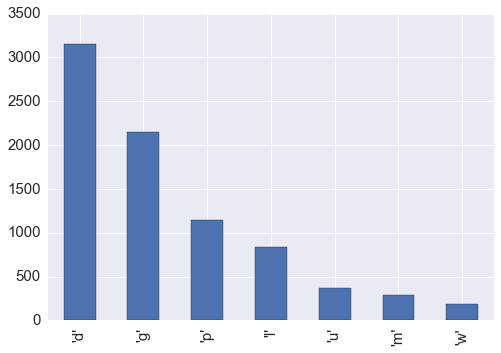

In [5]:
mushrooms["habitat"].value_counts().plot.bar(fontsize = 15)

Как ни странно, но большинство грибов ростут в лесу а не на помойках.

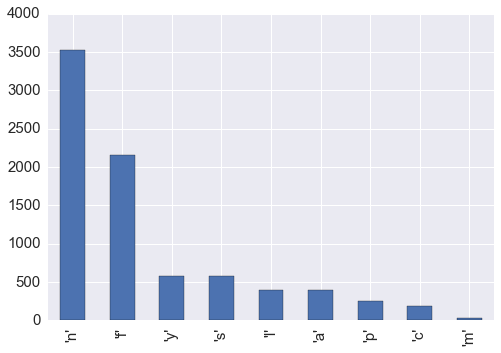

In [6]:
mushrooms["odor"].value_counts().plot.bar(fontsize = 15)

Больше 2000 экземпляров дурно пахнут. Может они ядовитые?

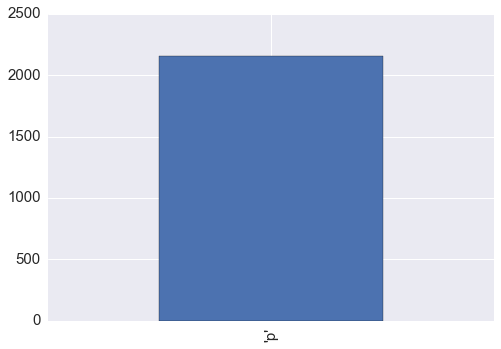

In [7]:
mushrooms[(mushrooms["odor"] == "'f'")]["class"].value_counts().plot.bar(fontsize = 15)

Вот это поворот! Эдак можно больше половины ядовитых грибов отсеять. Напрашивается бинарное дерево. Посмотрим, что с остальными запахами...

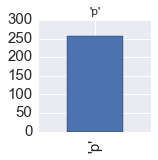

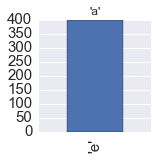

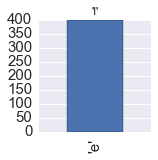

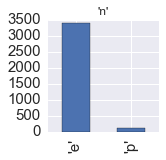

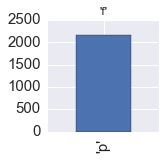

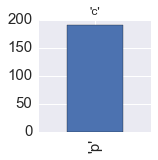

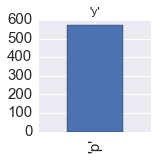

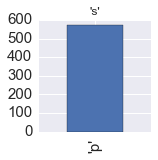

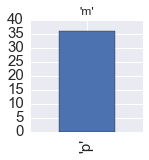

In [9]:
for uni in mushrooms["odor"].unique():
    plt.figure()
    mushrooms[(mushrooms["odor"] == uni)]["class"].value_counts().plot.bar(
        title = uni, fontsize = 15, figsize = (2,2))
    

Получается грибы можно распознать по запаху... все кроме тех что не пахнут

In [10]:
mushrooms[(mushrooms["odor"] == "'n'")]["class"].value_counts()

'e'    3408
'p'     120
Name: class, dtype: int64

Подобная классификация является первым правилом набора данный и даёт точность 98,52% точности и 120 пропущенных ядовитых грибов.

Посмотрим теперь где лучше собирать грибы:

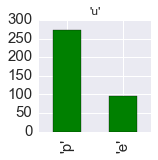

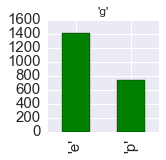

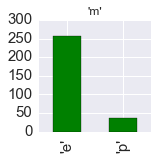

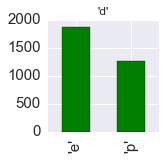

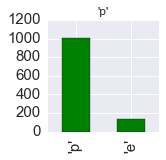

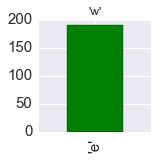

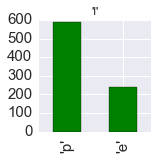

In [11]:
for uni in mushrooms["habitat"].unique():
    plt.figure()
    mushrooms[(mushrooms["habitat"] == uni)]["class"].value_counts().plot.bar(color = 'green', title = uni, fontsize = 15, figsize = (2,2))

Получается что гарантированно съедобные грибы только на помойке найти можно :O<br> Я это есть не буду!

In [12]:
mushrooms[(mushrooms["spore-print-color"] == "'r'")]["class"].value_counts()

'p'    72
Name: class, dtype: int64

Протестируем все 4 правила для получения 100% результата.

In [13]:
mushrooms[(mushrooms["spore-print-color"] == "'r'") | ~((mushrooms["odor"] == "'n'")
        | (mushrooms["odor"] == "'a'")| (mushrooms["odor"] == "'l'"))| 
        ((mushrooms["odor"] == "'n'") & (mushrooms["stalk-surface-below-ring"] == "'y'")
         & (mushrooms["stalk-color-above-ring"] != "'b'"))  | ((mushrooms["habitat"] == "'l'") 
        & (mushrooms["cap-color"] == "'w'"))]["class"].value_counts()

'p'    3916
'e'      16
Name: class, dtype: int64

Чтож без 16 съедобных грибов мы проживём, зато мы отсеяли все ядовитые и теперь останемся живы-здоровы.

Выводы: Были проанализированы такие наиболее "понятные" признаки, как запах и место произростания грибов. Была выявлена сильная зависимось съедобности шампиньонов от их запаха, а также проверены теории изложеные в описании набора данных.